In [17]:
import pandas as pd
df=pd.read_csv(r'C:\Users\S K Saxena\Downloads\tips (data for regression problem).csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


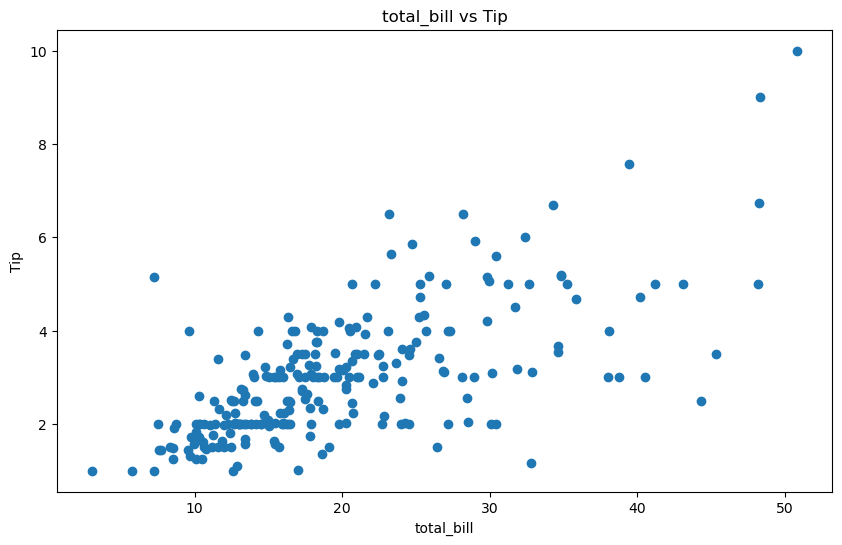

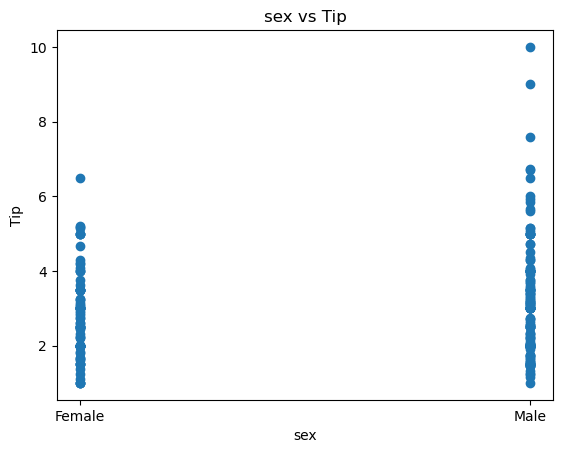

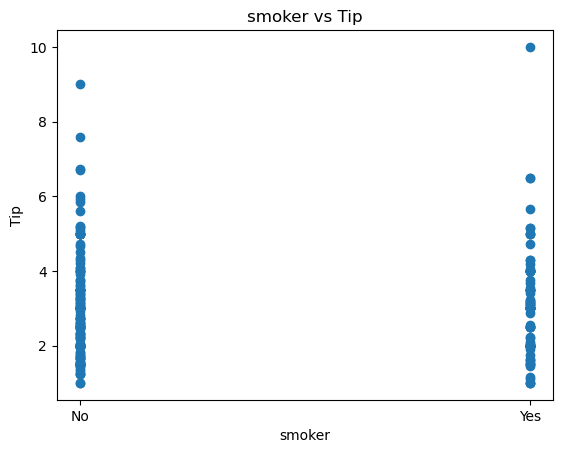

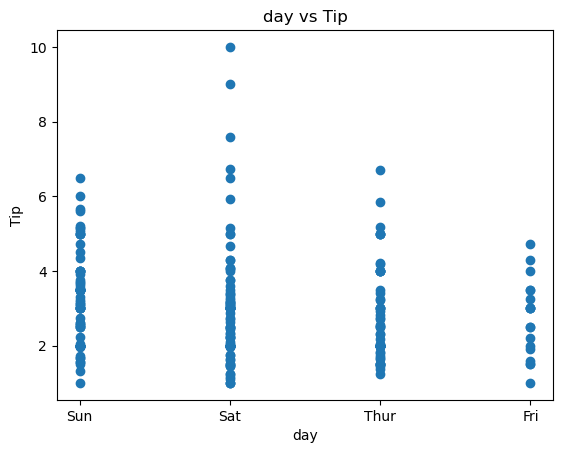

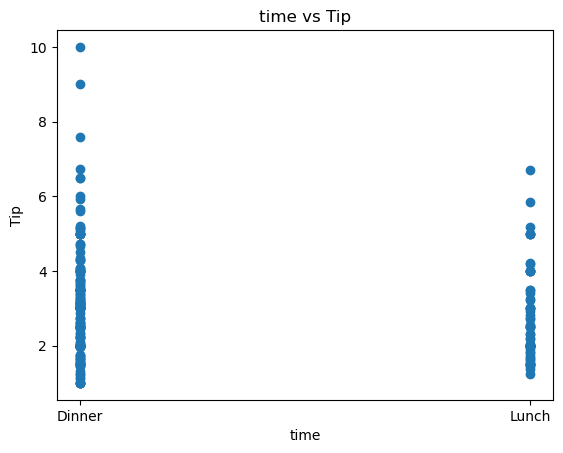

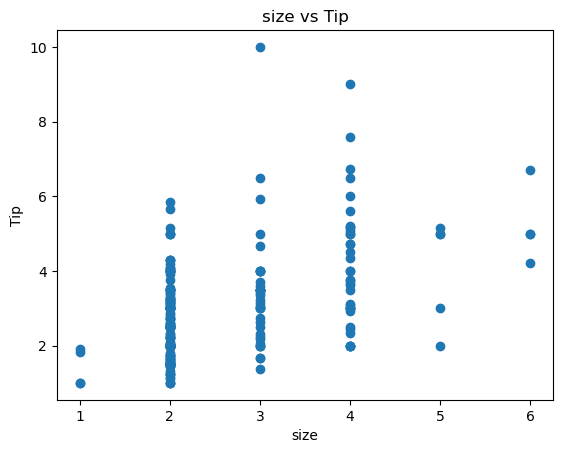

In [19]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()

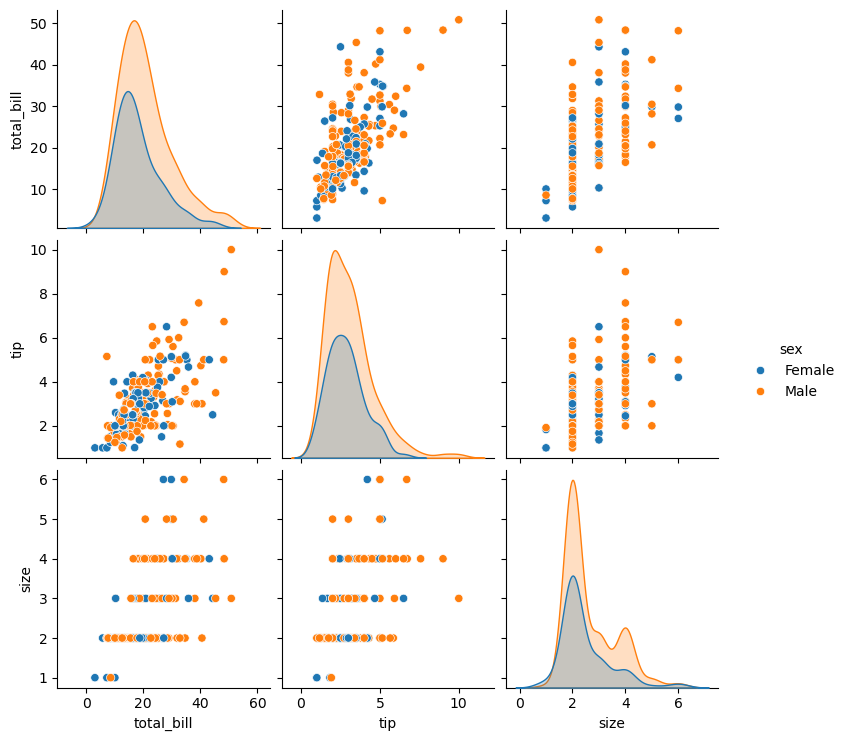

In [20]:
sns.pairplot(df, hue='sex')
plt.show()


<Axes: >

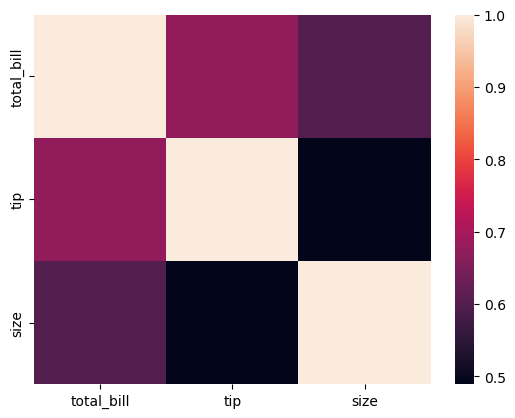

In [22]:
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

In [23]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Example using total_bill
X = sm.add_constant(df['total_bill'])  # Adding a constant term
y = df['tip']
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow Test Statistic:", rainbow_stat, "p-value:", rainbow_p_val)


Rainbow Test Statistic: 1.2291480226129026 p-value: 0.1291192152551375


As the p-value is higher than 0.05, we accept the null hypothesis and reject the alternative hypothesis, i.e., the regression is correctly modelled as linear.

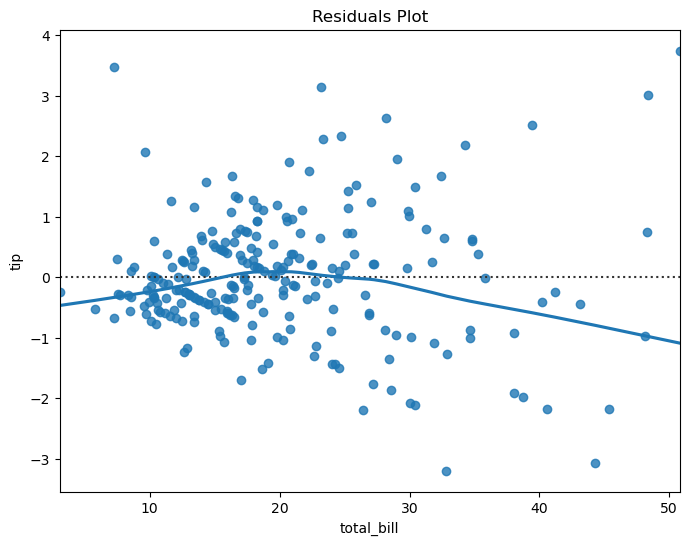

In [27]:
plt.figure(figsize=(8, 6))
sns.residplot(x='total_bill', y='tip', data=df, lowess=True)
plt.title('Residuals Plot')
plt.show()


Insights to improve customer service strategies and revenue management
1) Since total bill has a moderate correlation with tip, the restaurant could suggest tip amounts based on the bill size. For example, they could provide suggested tip percentages on the receipt, which may encourage customers to tip proportionally.
2) The restaurant could consider providing unique services or discounts for different sections, like special air purification in non-smoking sections, which might improve the tipping behavior of those customers.
3) The restaurant could focus on enhancing customer experience during dinner time to maximize tip amounts. 

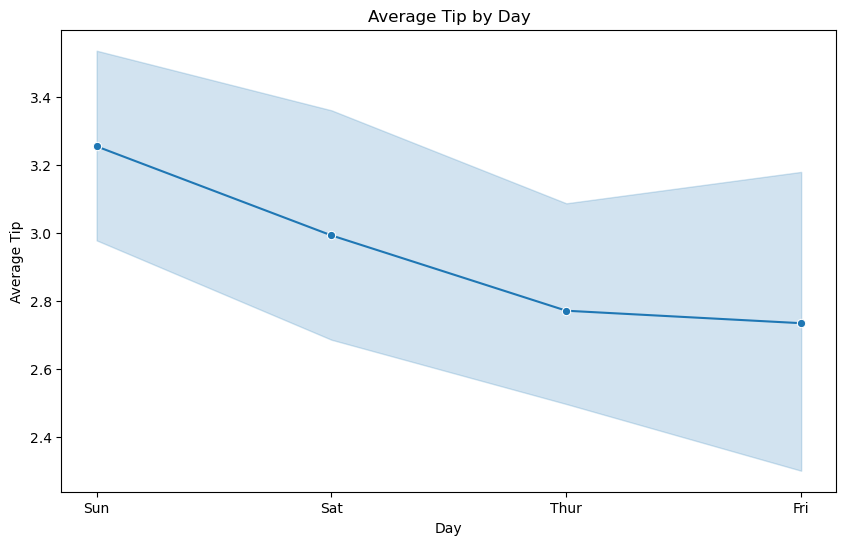

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Linear Regression R^2: 0.5449381659234664
Linear Regression RMSE: 0.7541977545199626


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
#RIDGE AND LASSO REGRESSION
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Ridge R^2:", r2_score(y_test, y_pred_ridge))
print("Lasso R^2:", r2_score(y_test, y_pred_lasso))


Ridge R^2: 0.544945834233854
Lasso R^2: 0.5462147597181777


In [37]:
#DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R^2:", r2_score(y_test, y_pred_dt))


Decision Tree R^2: -0.06898287247700985


In [39]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R^2:", r2_score(y_test, y_pred_rf))


Random Forest R^2: 0.19370766751511703


In [41]:
#SUPPORT VECTOR REGRESSION
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print("SVR R^2:", r2_score(y_test, y_pred_svr))


SVR R^2: 0.5729144808082876


In [43]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN R^2:", r2_score(y_test, y_pred_knn))


KNN R^2: 0.4545453410143979


In [45]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# Dictionary to store results
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN'],
    'R^2 Score': [0.4373, 0.4394, 0.5273, -0.0042, 0.2642, 0.5741, 0.2989],
    'RMSE': [
        mean_squared_error(y_test, lr.predict(X_test), squared=False),
        mean_squared_error(y_test, ridge.predict(X_test), squared=False),
        mean_squared_error(y_test, lasso.predict(X_test),squared=False),
        mean_squared_error(y_test, dt.predict(X_test),squared=False),
        mean_squared_error(y_test, rf.predict(X_test), squared=False),
        mean_squared_error(y_test, svr.predict(X_test), squared=False),
        mean_squared_error(y_test, knn.predict(X_test), squared=False)
    ]
}

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


               Model  R^2 Score      RMSE
0  Linear Regression     0.4373  0.754198
1   Ridge Regression     0.4394  0.754191
2   Lasso Regression     0.5273  0.753139
3      Decision Tree    -0.0042  1.155940
4      Random Forest     0.2642  1.003913
5                SVR     0.5741  0.730647
6                KNN     0.2989  0.825713


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


t